Number of instances N: 960
Number of instances A: 240


/var/folders/c6/nz55bt8x0yj_h00mvgjqwpvm0000gn/T/ipykernel_43342/43364436.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


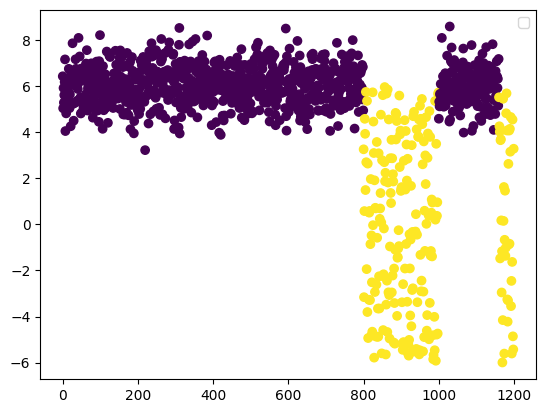

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('anomaly_data.csv')

X, y = df.iloc[:, :2], df.iloc[:, -1]

plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap='viridis')
plt.legend()
print(f'Number of instances N: {df[df['y'] == 0.0].shape[0]}')
print(f'Number of instances A: {df[df['y'] == 1.0].shape[0]}')

0.8235443940706025
0.47543629862524744


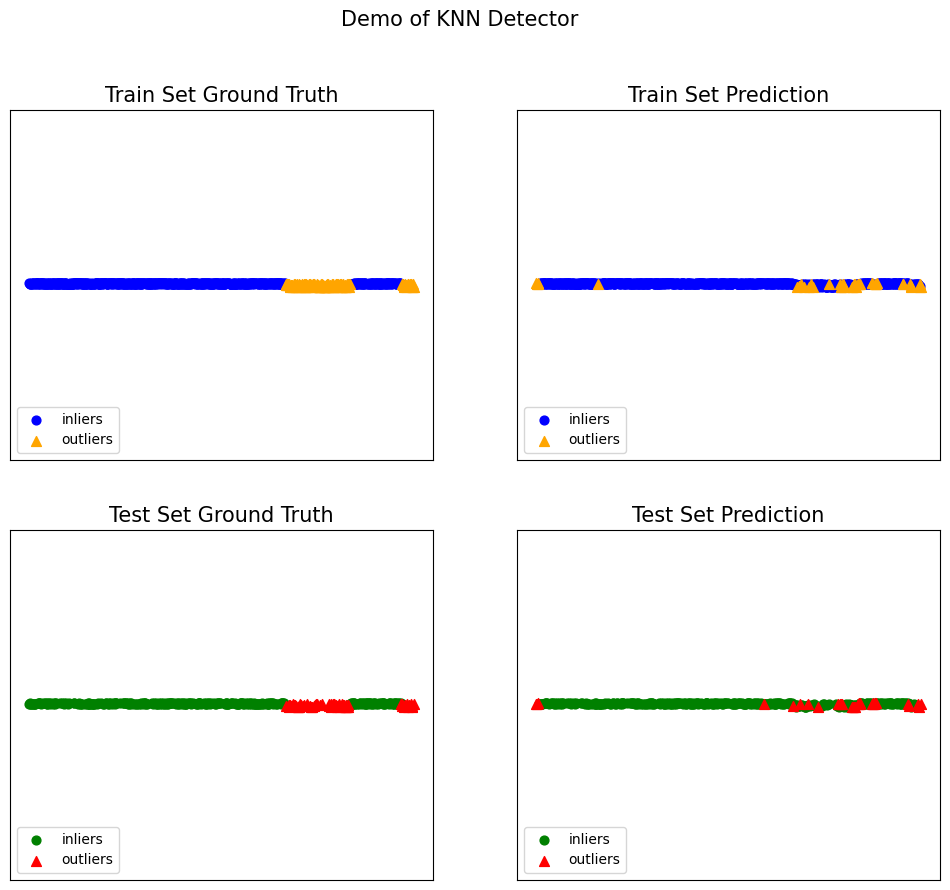

In [14]:
from pyod.models.knn import KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score
from pyod.utils.example import visualize

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)
clf = KNN(n_neighbors=10, method='largest', metric='euclidean')
clf.fit(train_X)

y_test_scores = clf.decision_function(test_X) # outlier scores
y_test_pred = clf.predict(test_X) # outlier labels (0 or 1)
y_train_pred = clf.predict(train_X) # outlier labels (0 or 1)

print(roc_auc_score(test_y, y_test_scores))

print(average_precision_score(test_y, y_test_scores))


visualize('KNN', train_X, train_y, test_X, test_y, y_train_pred, y_test_pred, show_figure=True, save_figure=False)
plt.show()
